# DATA CHALLENGE - Riskspan
Bitcamp2019

In [23]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split



loan_origin = pd.read_csv("bitcamp-master/Loan_origin.csv")
Loan_Health = pd.read_csv("bitcamp-master/Loan_Health.csv")

In [24]:
loan_origin.head()

,nb_loan_number,nb_original_balance,nb_original_fico,nb_debt_ratio,nb_original_rate,nb_original_ltv,nb_original_cltv,nb_unit_count,nb_original_term,nb_io_term,nb_origination_date,nb_maturity_date,nb_purpose_code,nb_occupancy_code,nb_documentation_type_code,nb_property_type_code,nb_property_zip_code
0,2,254700.0,613.0,NaN,NaN,90.00,0.0,1,360,60.0,6/30/04,7/1/34,RefiWithCash,Owner,AllDocs,SingleFamily,95829
1,3,209000.0,632.0,NaN,NaN,88.94,0.0,1,360,NaN,7/30/04,8/1/34,RefiWithCash,NotOwner,LimitedDocs,Condo,90805
2,4,160000.0,590.0,NaN,NaN,42.67,0.0,1,360,60.0,8/23/04,9/1/34,RefiWithCash,Owner,AllDocs,SingleFamily,90041
3,5,130000.0,502.0,NaN,NaN,66.67,0.0,1,360,NaN,8/17/04,9/1/34,Refi,Owner,AllDocs,PUD,85541
4,6,255000.0,611.0,NaN,NaN,60.00,0.0,1,360,NaN,10/18/04,11/1/34,RefiWithCash,Owner,AllDocs,SingleFamily,90620


In [25]:
Loan_Health.head()

,nb_loan_number,nb_factor_date,nb_current_balance,nb_realized_loss,nb_age,nb_delinquent_days
0,2,3/1/05,254698.01,0.0,7,0.0
1,2,4/1/05,254698.01,0.0,8,0.0
2,2,5/1/05,0.00,0.0,9,NaN
3,2,6/1/05,0.00,0.0,10,NaN
4,2,7/1/05,0.00,0.0,11,NaN


We merge the two tables for analysis.

In [26]:
result = pd.merge(loan_origin,
                 Loan_Health[[ "nb_loan_number",'nb_factor_date', 'nb_current_balance','nb_realized_loss','nb_age','nb_delinquent_days']],
                 on='nb_loan_number')
result.head()





,nb_loan_number,nb_original_balance,nb_original_fico,nb_debt_ratio,nb_original_rate,nb_original_ltv,nb_original_cltv,nb_unit_count,nb_original_term,nb_io_term,...,nb_purpose_code,nb_occupancy_code,nb_documentation_type_code,nb_property_type_code,nb_property_zip_code,nb_factor_date,nb_current_balance,nb_realized_loss,nb_age,nb_delinquent_days
0,2,254700.0,613.0,NaN,NaN,90.0,0.0,1,360,60.0,...,RefiWithCash,Owner,AllDocs,SingleFamily,95829,3/1/05,254698.01,0.0,7,0.0
1,2,254700.0,613.0,NaN,NaN,90.0,0.0,1,360,60.0,...,RefiWithCash,Owner,AllDocs,SingleFamily,95829,4/1/05,254698.01,0.0,8,0.0
2,2,254700.0,613.0,NaN,NaN,90.0,0.0,1,360,60.0,...,RefiWithCash,Owner,AllDocs,SingleFamily,95829,5/1/05,0.00,0.0,9,NaN
3,2,254700.0,613.0,NaN,NaN,90.0,0.0,1,360,60.0,...,RefiWithCash,Owner,AllDocs,SingleFamily,95829,6/1/05,0.00,0.0,10,NaN
4,2,254700.0,613.0,NaN,NaN,90.0,0.0,1,360,60.0,...,RefiWithCash,Owner,AllDocs,SingleFamily,95829,7/1/05,0.00,0.0,11,NaN


In [27]:
## Count of loan_repaid and not paid
result.groupby('nb_delinquent_days').count()


,nb_loan_number,nb_original_balance,nb_original_fico,nb_debt_ratio,nb_original_rate,nb_original_ltv,nb_original_cltv,nb_unit_count,nb_original_term,nb_io_term,...,nb_maturity_date,nb_purpose_code,nb_occupancy_code,nb_documentation_type_code,nb_property_type_code,nb_property_zip_code,nb_factor_date,nb_current_balance,nb_realized_loss,nb_age
nb_delinquent_days,,,,,,,,,,,,,,,,,,,,,
0.0,30446,30446,30077,0,0,30446,30446,30446,30446,1937,...,30446,30446,30446,30446,30446,30446,30446,30446,30446,30446
30.0,2823,2823,2816,0,0,2823,2823,2823,2823,137,...,2823,2823,2823,2823,2823,2823,2823,2823,2823,2823
60.0,1207,1207,1204,0,0,1207,1207,1207,1207,55,...,1207,1207,1207,1207,1207,1207,1207,1207,1207,1207
90.0,2269,2269,2245,0,0,2269,2269,2269,2269,105,...,2269,2269,2269,2269,2269,2269,2269,2269,2269,2269


Around 47k loans were sanctioned, amongst them around 17k loans went bad. Our agenda is to fix this problem.

In [28]:
## Fill the NA values in the table
result = result.fillna(2)

In [29]:
df1 = result

In [30]:
##Predictor Variable
df1['loan_default'] = np.where(df1['nb_delinquent_days']< 30, 0, 1)


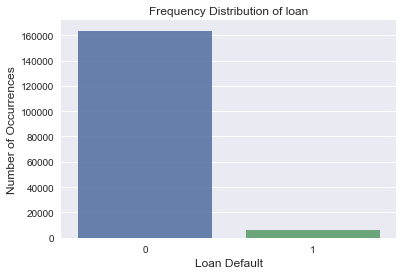

In [10]:
%matplotlib inline
type_count = df1['loan_default'].value_counts()
sns.set(style="darkgrid")
sns.barplot(type_count.index, type_count.values, alpha=0.9)
plt.title('Frequency Distribution of loan')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan Default', fontsize=12)
plt.show()


In [11]:
issuance_data = pd.read_csv("bitcamp-master/Issuance_data.csv")


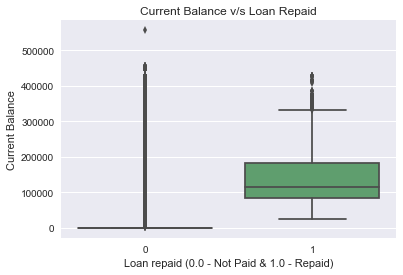

In [13]:
fig2=sns.boxplot(df1['loan_default'],df1['nb_current_balance'])
plt.ylabel("Current Balance")
plt.xlabel("Loan repaid (0.0 - Not Paid & 1.0 - Repaid)")
plt.title("Current Balance v/s Loan Repaid") 
plt.show(fig2)


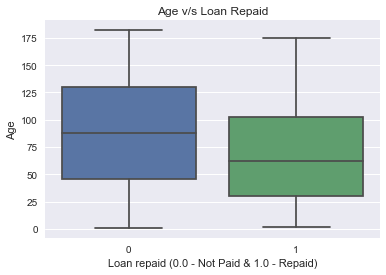

In [14]:
fig3=sns.boxplot(df1['loan_default'],df1['nb_age'])
plt.ylabel("Age")
plt.xlabel("Loan repaid (0.0 - Not Paid & 1.0 - Repaid)")
plt.title("Age v/s Loan Repaid") 
plt.show(fig3)


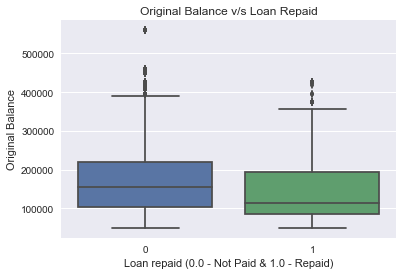

In [15]:
fig4=sns.boxplot(df1['loan_default'],df1['nb_original_balance'])
plt.ylabel("Original Balance")
plt.xlabel("Loan repaid (0.0 - Not Paid & 1.0 - Repaid)")
plt.title("Original Balance v/s Loan Repaid") 
plt.show(fig4)


In [31]:
## We will have create dummies for Loan Type Categorical variable
df1 = pd.get_dummies(df1, columns=['nb_occupancy_code',"nb_documentation_type_code","nb_property_type_code","nb_purpose_code"],drop_first=False)


In [32]:
#keep a copy of the previous dataframe and work on the new copy
df =df1

In [33]:
X = df.drop(["nb_delinquent_days","loan_default","nb_unit_count","nb_debt_ratio","nb_original_rate","nb_origination_date","nb_factor_date","nb_realized_loss","nb_loan_number","nb_maturity_date","nb_origination_date","nb_factor_date"],axis = 1)

In [34]:
Y = df["loan_default"]

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


In [49]:
# train = train.drop(['month','date','loan_granted','loan_id','loan_repaid'] ,axis = 1)
# test = test.drop(['month','date','loan_granted','loan_id','loan_repaid'] ,axis = 1)



In [50]:
X.count()

nb_original_balance                       169830
nb_original_fico                          169830
nb_original_ltv                           169830
nb_original_cltv                          169830
nb_original_term                          169830
nb_io_term                                169830
nb_property_zip_code                      169830
nb_current_balance                        169830
nb_age                                    169830
nb_occupancy_code_NotOwner                169830
nb_occupancy_code_Owner                   169830
nb_occupancy_code_Second                  169830
nb_documentation_type_code_AllDocs        169830
nb_documentation_type_code_LimitedDocs    169830
nb_documentation_type_code_NoDocs         169830
nb_property_type_code_Condo               169830
nb_property_type_code_Multi               169830
nb_property_type_code_PUD                 169830
nb_property_type_code_SingleFamily        169830
nb_purpose_code_Purchase                  169830
nb_purpose_code_Refi

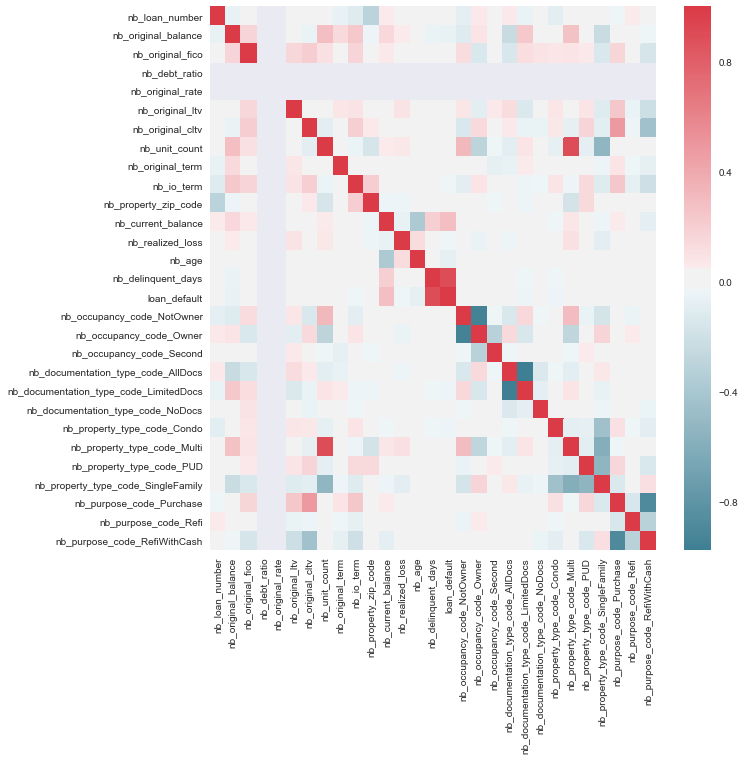

In [161]:
## Correlation plot of Data

plt.figure(figsize=(10,10)) 

s=sns.heatmap(df1.corr(),cmap=sns.diverging_palette(220, 10, as_cmap=True))


## Select most important variables

In [163]:
X_train.head()

,nb_original_balance,nb_original_fico,nb_original_ltv,nb_original_cltv,nb_original_term,nb_io_term,nb_property_zip_code,nb_current_balance,nb_age,nb_occupancy_code_NotOwner,...,nb_documentation_type_code_AllDocs,nb_documentation_type_code_LimitedDocs,nb_documentation_type_code_NoDocs,nb_property_type_code_Condo,nb_property_type_code_Multi,nb_property_type_code_PUD,nb_property_type_code_SingleFamily,nb_purpose_code_Purchase,nb_purpose_code_Refi,nb_purpose_code_RefiWithCash
67123,266000.0,648.0,95.0,0.0,360,2.0,8094,0.00,145,0,...,1,0,0,0,0,0,1,0,0,1
59937,106200.0,771.0,90.0,0.0,360,2.0,14607,94529.22,99,1,...,1,0,0,0,1,0,0,1,0,0
57686,111300.0,532.0,70.0,0.0,360,2.0,43701,0.00,58,0,...,0,1,0,0,0,0,1,1,0,0
138107,120000.0,641.0,80.0,0.0,360,2.0,80010,0.00,71,0,...,1,0,0,0,0,0,1,0,0,1
80291,163924.0,678.0,80.0,100.0,360,60.0,98271,0.00,55,0,...,0,1,0,0,0,0,1,1,0,0


In [36]:
linear_dep = pd.DataFrame()


In [165]:
for col in X_train.columns:
    linear_dep.loc[col, 'pearson_corr'] = X_train[col].corr(Y_train)
linear_dep['abs_pearson_corr'] = abs(linear_dep['pearson_corr'])


In [166]:
for col in X_train.columns:
    mask = X_train[col].notnull()
    (linear_dep.loc[col, 'F'], linear_dep.loc[col, 'p_value']) = f_classif(pd.DataFrame(X_train.loc[mask, col]), Y_train.loc[mask])




In [167]:
linear_dep.sort_values('abs_pearson_corr', ascending=False, inplace=True)
linear_dep.drop('abs_pearson_corr', axis=1, inplace=True)


In [168]:
linear_dep.reset_index(inplace=True)
linear_dep.rename(columns={'index':'variable'}, inplace=True)


In [169]:
linear_dep


,variable,pearson_corr,F,p_value
0,nb_current_balance,0.279848,11544.075474,0.000000e+00
1,nb_age,-0.073900,746.052267,8.056578e-164
2,nb_original_balance,-0.061469,515.284919,7.325776e-114
3,nb_documentation_type_code_AllDocs,0.037447,190.761444,2.319977e-43
4,nb_property_type_code_Condo,-0.037288,189.162020,5.177452e-43
5,nb_documentation_type_code_LimitedDocs,-0.035377,170.253798,6.873072e-39
6,nb_original_ltv,0.032290,141.802235,1.115341e-32
7,nb_io_term,-0.028003,106.622055,5.502997e-25
8,nb_purpose_code_RefiWithCash,-0.023451,74.767874,5.350611e-18
9,nb_original_fico,-0.018938,48.744432,2.929145e-12


In [37]:
# Logistic Regression Model
logreg = LogisticRegression(n_jobs=1, C=10000)

logreg.fit(X_train, Y_train)


/Users/snehalbedmutha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
# Logistic Regression Output
y_pred_log_red = logreg.predict(X_test)

In [62]:
y_pred_log_red

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

print('Testing accuracy %s' % accuracy_score(Y_test, y_pred_log_red))
print('Testing F1 score: {}'.format(f1_score(Y_test, y_pred_log_red, average = 'weighted')))
print(confusion_matrix(Y_test, y_pred_log_red))
print('Area Under the Curve') 
print(roc_auc_score(Y_test, y_pred_log_red))

Testing accuracy 0.9594300182535477
Testing F1 score: 0.9437850166994551
[[32528    98]
 [ 1280    60]]
Area Under the Curve
0.5208861900269998


0.5208861900269998


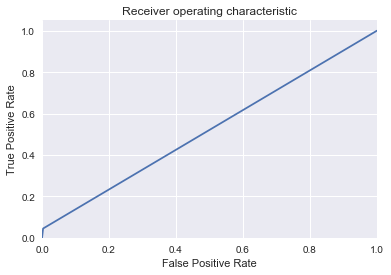

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_test, y_pred_log_red)
    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc_score(Y_test, y_pred_log_red))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()


In [41]:
## Random Forest Model
# Instantiate model with 200 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf.fit(X_train, Y_train);


In [56]:
# Random Forest Output
y_pred_rf = rf.predict(X_test)

In [55]:
# Rounding output to 0s and !s
y_pred_rf = np.around(y_pred_rf)

In [44]:
y_pred_rf

array([0., 1., 0., ..., 0., 0., 0.])

In [46]:
print('Testing accuracy %s' % accuracy_score(Y_test, y_pred_rf))
print('Testing F1 score: {}'.format(f1_score(Y_test, y_pred_rf, average = 'weighted')))
print(confusion_matrix(Y_test, y_pred_rf))
print('Area Under the Curve') 
print(roc_auc_score(Y_test, y_pred_rf))

Testing accuracy 0.9820114231878938
Testing F1 score: 0.9816939544340504
[[32368   258]
 [  353   987]]
Area Under the Curve
0.8643296802934387


0.9827260512858986


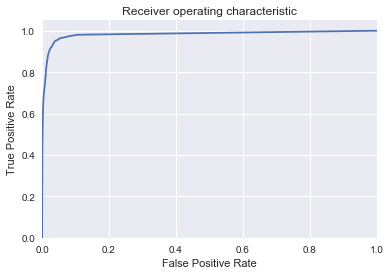

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_test, y_pred_rf)
    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc_score(Y_test, y_pred_rf))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()


# import scikitplot as skplt
# import matplotlib.pyplot as plt

# # y_true = # ground truth labels
# # y_probas = # predicted probabilities generated by sklearn classifier
# skplt.metrics.plot_roc_curve(Y_test, y_pred_rf)
# plt.show()
